In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
%%html
<style>
  table {margin-left: 0 !important;}
</style>

# Table 1


| Attribute | Description |
|-----------|:-------------|
| F1        | F1 score obtained from evaluating the RF on the test data |
| Method    | where features come from; raw data, pca, un- / pre- / re-trained CNN |
| Class     | which part of the brain |
| Set       | from which set the data comes from; set 1 and 2 from paper |
| Iter      | in which iteration the result was obtained. Here, we do 10 iterations |

In [5]:
df_table1 = pd.read_pickle('table1_data')
df_table1.head()

,f1,method,class,set,iter
0,0.764839,raw,Other,1,0
1,0.115144,raw,CG,1,0
2,0.357311,raw,CST,1,0
3,0.101185,raw,FX,1,0
4,0.432561,raw,CC,1,0


In [6]:
df_table1.groupby(['method', 'class', 'set']).mean().head()

f1
method class set          
pca    Avg   1    0.293318
             2    0.164220
       CC    1    0.418292
       CG    1    0.256288
       CST   1    0.352515

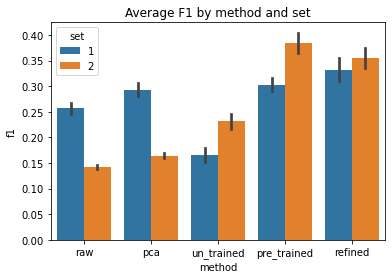

In [7]:
p = sns.barplot(data=df_table1[df_table1['class'] == 'Avg'], x='method', y='f1', hue='set')
plt.title("Average F1 by method and set")
plt.show()
#p.get_figure().savefig('avg_f1.png', dpi=800)

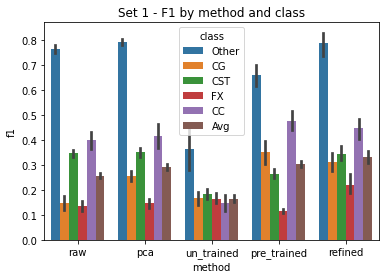

In [8]:
p = sns.barplot(data=df_table1[df_table1['set'] == 1], x='method', y='f1', hue='class')
plt.title("Set 1 - F1 by method and class")
plt.show()
#p.get_figure().savefig('set1.png', dpi=800)

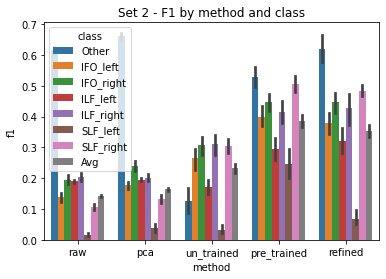

In [9]:
p = sns.barplot(data=df_table1[df_table1['set'] == 2], x='method', y='f1', hue='class')
plt.title("Set 2 - F1 by method and class")
plt.show()
#p.get_figure().savefig('set1.png', dpi=800)

_________________
# Ablation Study

| Attribute | Description |
|-----------|:-------------|
| F1        | F1 score obtained from evaluating the RF on the test data |
| Ablate    | which component is ablated, i.e. no regularizer used |
| T         | Iterator over annotation cycles, i.e. 'time' |
| Class     | which part of the brain |
| Set       | from which set the data comes from; set 1 and 2 from paper |
| Iter      | in which iteration the result was obtained. Here, we do 10 iterations |

In [17]:
df_ablation = pd.read_pickle('ablation_new')
df_ablation.head()

,f1,ablate,t,class,set,iter
0,0.688962,full,0,Other,1,0
1,0.349903,full,0,CG,1,0
2,0.267482,full,0,CST,1,0
3,0.146192,full,0,FX,1,0
4,0.458017,full,0,CC,1,0


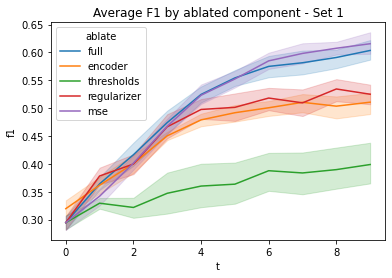

In [18]:
p = sns.lineplot(data=df_ablation[(df_ablation['class'] == 'Avg') & (df_ablation['set'] == 1)], x='t', y='f1', hue='ablate')
plt.title("Average F1 by ablated component - Set 1")
plt.show()

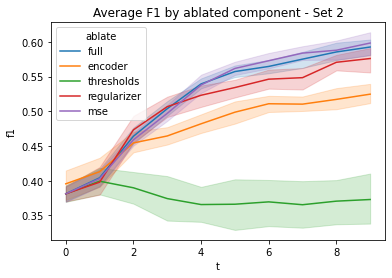

In [19]:
p = sns.lineplot(data=df_ablation[(df_ablation['class'] == 'Avg') & (df_ablation['set'] == 2)], x='t', y='f1', hue='ablate')
plt.title("Average F1 by ablated component - Set 2")
plt.show()